In [52]:
#Подключаем Библиотеки
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import pandas as pd
from math import pi, log, tan


#Вывод в нотбук, для лучшей отладки
%matplotlib inline

In [54]:
# При решении использовались следующие версии:
print(f'python: {sys.version}',
      f'numpy: {np.__version__}',
      f'matplotlib: {matplotlib.__version__}',
      f'pandas: {pd.__version__}', sep = '\n')

python: 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3


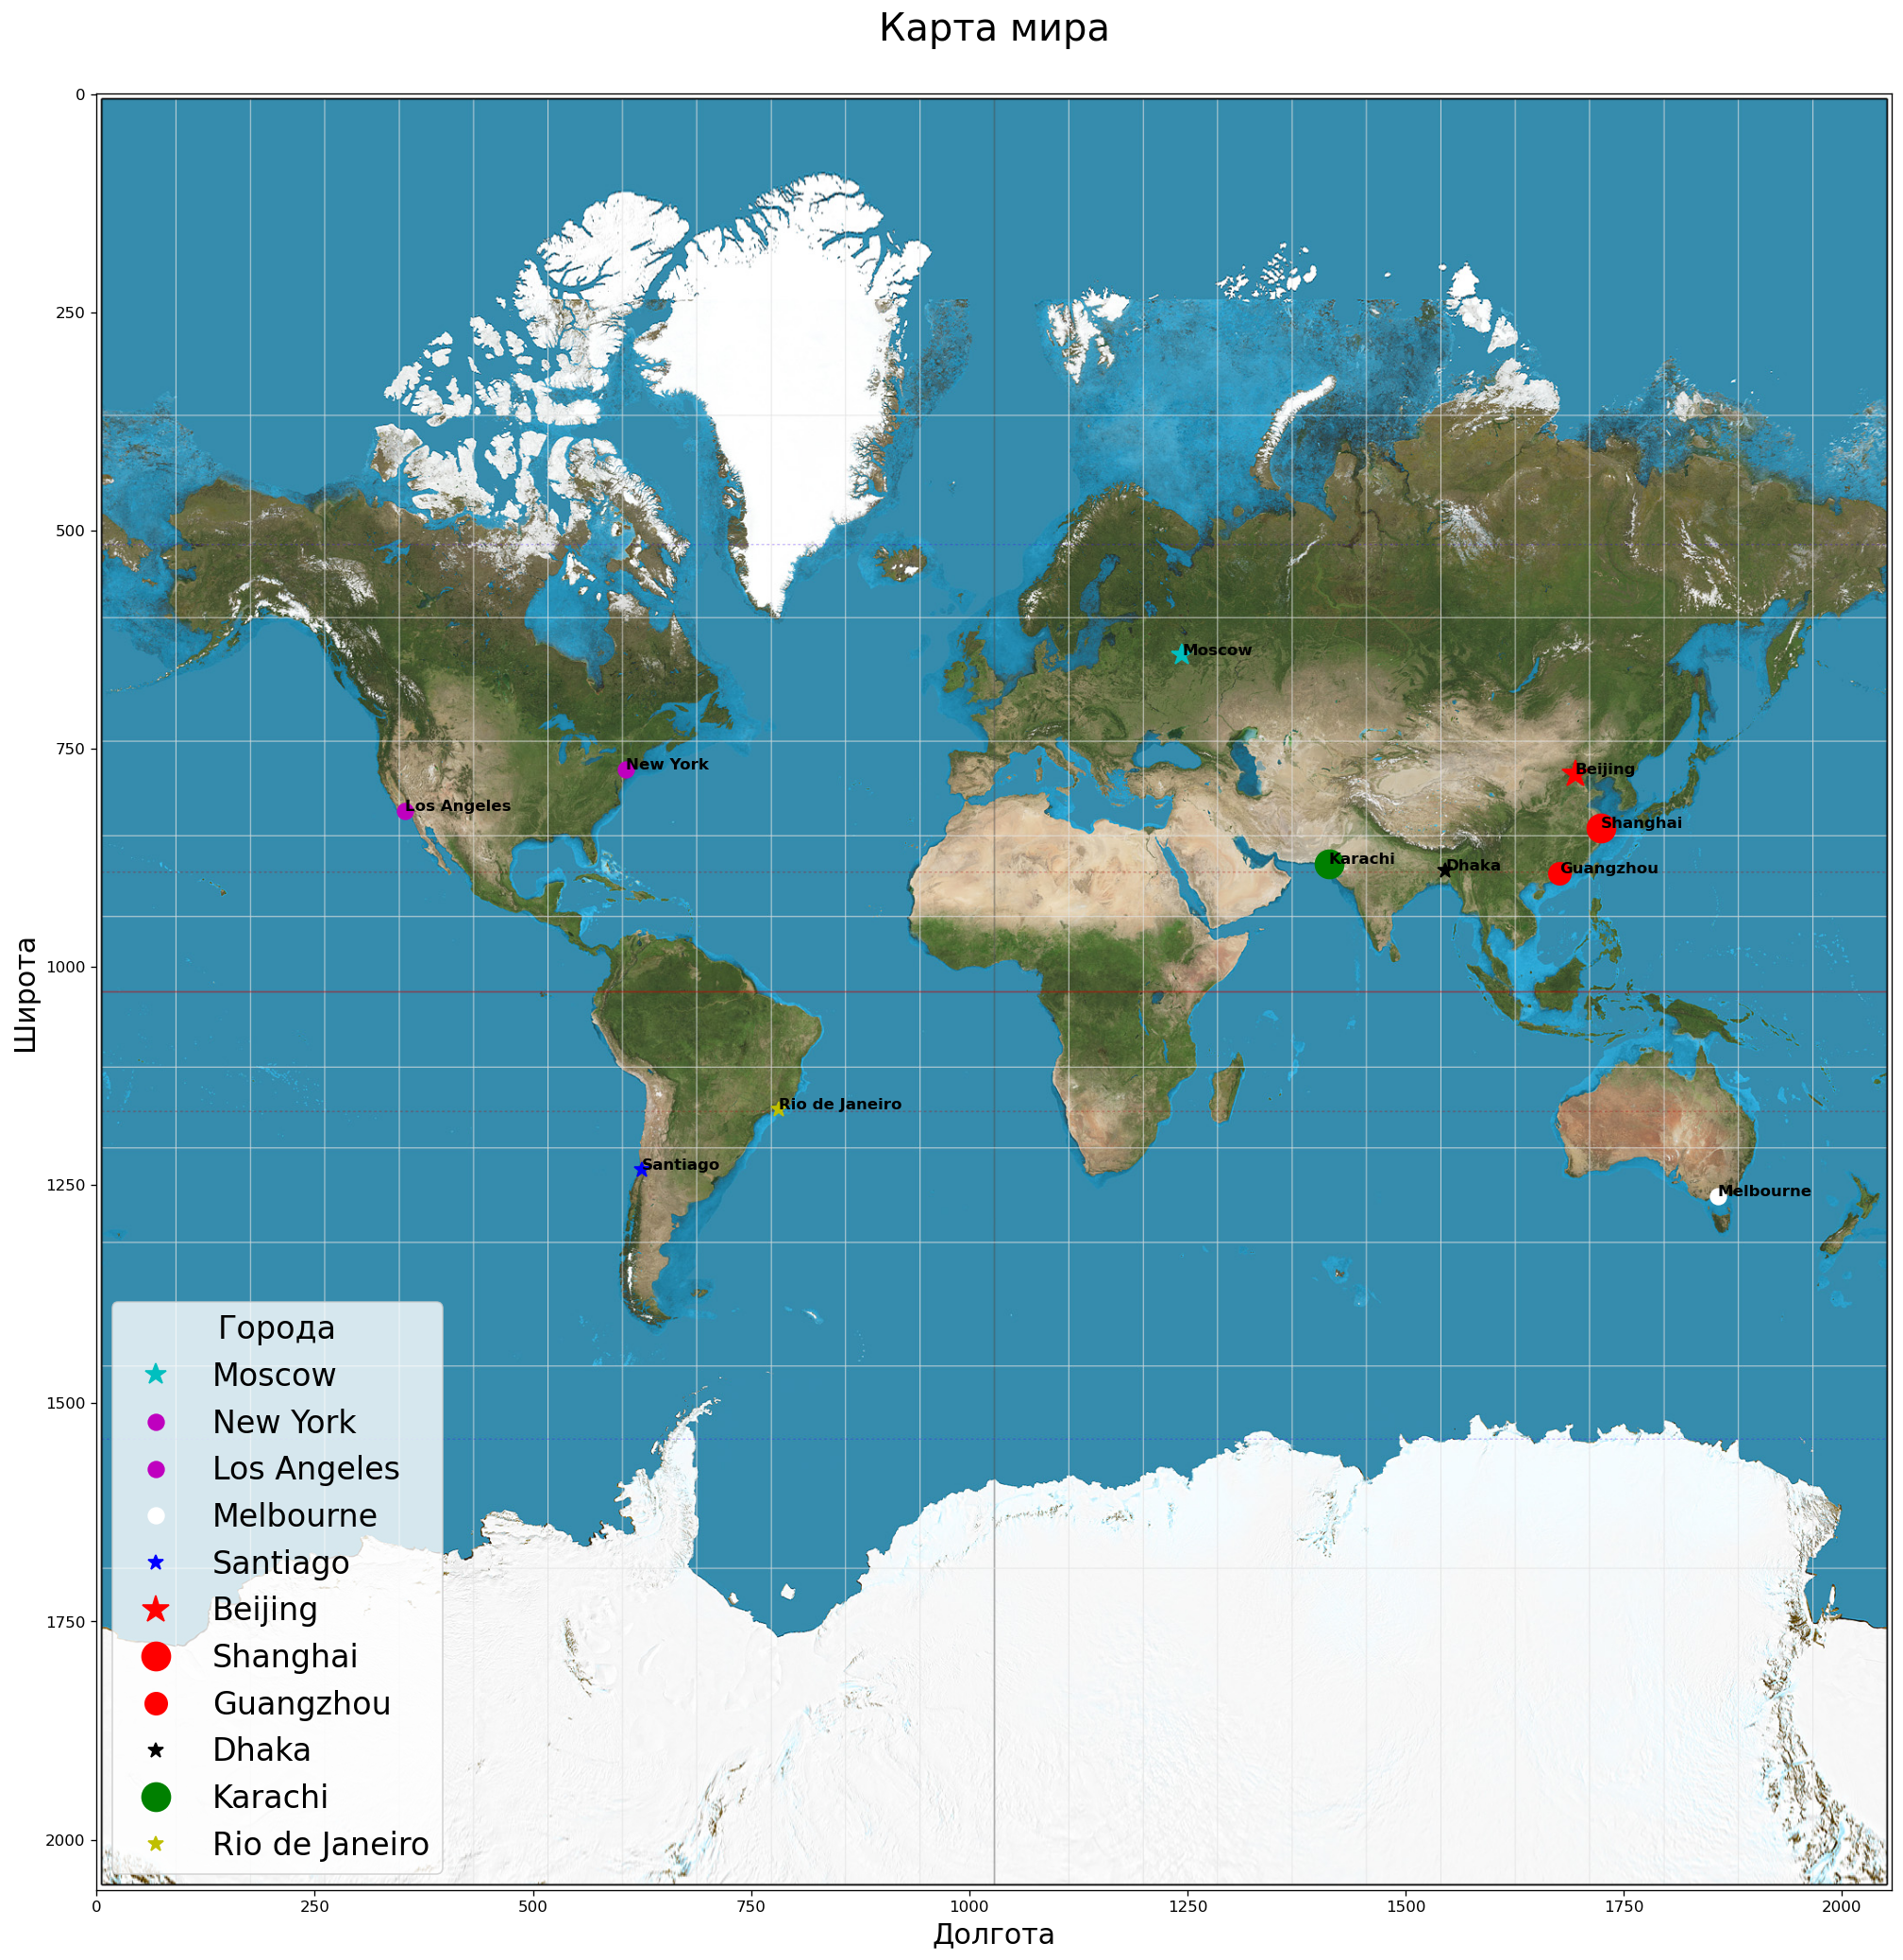

In [56]:
# Картинка скачана тоже 2058x2058
# Ширина карты
mapWidth  = 2058
# Высота карты
mapHeight = 2058

# Расчёт широты Y какa проекции Герарда Меркатора
def latitude(degree, minute, second):
    # Находим значение радиан, по общей формуле
    radian = (degree * pi) / 180 + (minute * pi) / (180 * 60) + (second * pi) / (180 * 60 * 60)
    return -log(tan((pi / 4) + (radian / 2)))* mapHeight / (2 * pi) + mapHeight / 2
    
# Расчёт долготы X как проекции Герарда Меркатора
def longitude(degree, minute, second):
    # Находим значение радиан, по общей формуле
    radian = (degree * pi) / 180 + (minute * pi) / (180 * 60) + (second * pi) / (180 * 60 * 60)
    return radian * mapWidth / (2 * pi) + mapWidth / 2

   
# Запишем изображение карты в переменную, что б открыть  дальнейшем
with open('world.jpg', 'rb') as world:
    worldmap = plt.imread(world)

# Создадим объекты фигуры и оси
fig, axes = plt.subplots(figsize = (21, 21), dpi = 120)
axes.imshow(worldmap)

# Считаем в переменную файл таблицы
df = pd.read_csv('cities.csv')

# Создадим переменную с названием всех стран и отсортируем
countries = list(set([i for i in df['Country']]))
countries.sort()

# Создадим переменную  цветом
color = ['w', 'k', 'y', 'b', 'r', 'g', 'c', 'm']
d = dict()

# Зададим каждой стране в соответвие какой-то цвет
for i in range(len(color)):
    d[countries[i]] = color[i]
    
# Цикл, который делает пометки на нашей "карте"  
for i in range(len(df['Name'])):
    if df['Population'][i] > 1_000_000:
        longitude_ = longitude(df['Latitude deg'][i], df['Latitude min'][i], df['Latitude sec'][i])
        latitude_ = latitude(df['Longitude deg'][i], df['Longitude min'][i], df['Longitude sec'][i])
        
        # Определяем вид маркера
        marker = '*' if df['Capital'][i] else 'o'
        
        # Определяем размер маркера
        if df['Population'][i] <= 10000000:
            size = 10   
        elif df['Population'][i] > 10000000 and df['Population'][i] <= 20000000:
            size = 14
        elif df['Population'][i] > 20000000:
            size = 18
        
        # Отрисовываем маркер по координатам города i
        axes.plot(longitude_, latitude_, color = d[df['Country'][i]], marker = marker, markersize = size, label = df['Name'][i] , lw = 0) 
        
        # Отрисовываем название города i
        axes.text(longitude_ , latitude_, df['Name'][i], fontsize = 'medium', fontweight = 'semibold')
        
# Задаем название карты        
axes.set_title('Карта мира\n', fontsize = 24)

# Задаем название осей
axes.set_xlabel('Долгота', fontsize = 18)
axes.set_ylabel('Широта', fontsize = 18)

# Включаем отображение легенды
axes.legend(title = 'Города', loc = 3, fontsize = 20, title_fontsize = 20)

# Отобразить фигуру
plt.show()